In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def get_data():
  df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/acea-water-prediction/Water_Spring_Amiata.csv')
  df['date'] = pd.to_datetime(df['Date'])
  df['year'] = df.date.dt.year
  df['month'] = df.date.dt.month
  return df

In [ ]:
df = get_data()
df.head()

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta,date,year,month
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN,2000-01-01,2000,1
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN,2000-02-01,2000,2
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN,2000-03-01,2000,3
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN,2000-04-01,2000,4
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN,2000-05-01,2000,5


In [ ]:
import seaborn as sns

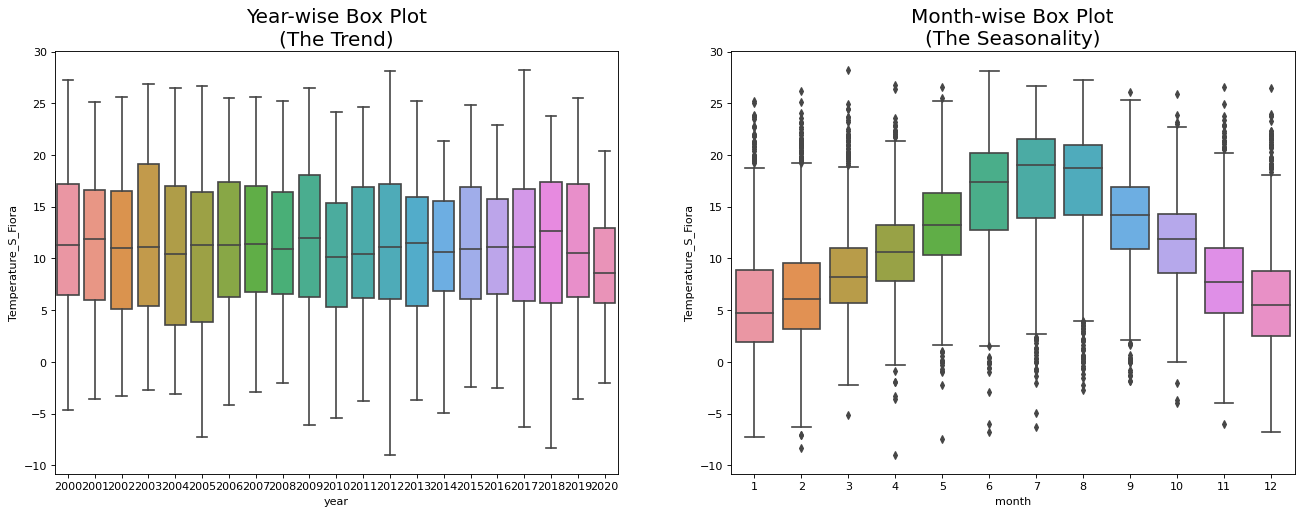

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Temperature_S_Fiora', data=df, ax=axes[0])
sns.boxplot(x='month', y='Temperature_S_Fiora', data=df)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   Date                                   7487 non-null   object        
 1   Rainfall_Castel_del_Piano              6291 non-null   float64       
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64       
 3   Rainfall_S_Fiora                       2633 non-null   float64       
 4   Rainfall_Laghetto_Verde                2865 non-null   float64       
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64       
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64       
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64       
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64       
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64 

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

### **Differencing**

In [ ]:
# First Order Differencing
ts_diff = np.diff(df['Temperature_S_Fiora'])
df['Temperature_S_Fiora_diff1'] = np.append([0], ts_diff)


In [ ]:
dataset = pd.DataFrame(df['Temperature_S_Fiora'])

In [ ]:
print(len(dataset))


7487


In [ ]:
print(dataset.shape)

(7487, 1)


In [ ]:
dataset['date'] = pd.to_datetime(df['Date'])

In [ ]:
dataset

,Temperature_S_Fiora,date
0,-0.15,2000-01-01
1,1.55,2000-02-01
2,2.70,2000-03-01
3,4.00,2000-04-01
4,4.60,2000-05-01
...,...,...
7482,18.30,2020-06-26
7483,17.95,2020-06-27
7484,19.90,2020-06-28
7485,20.15,2020-06-29


In [ ]:
dataset = dataset.sort_index(ascending=True)


In [ ]:
dataset = dataset.set_index('date')

In [ ]:
dataset

,Temperature_S_Fiora
date,
2000-01-01,-0.15
2000-02-01,1.55
2000-03-01,2.70
2000-04-01,4.00
2000-05-01,4.60
...,...
2020-06-26,18.30
2020-06-27,17.95
2020-06-28,19.90


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7487 entries, 2000-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature_S_Fiora  7487 non-null   float64
dtypes: float64(1)
memory usage: 117.0 KB


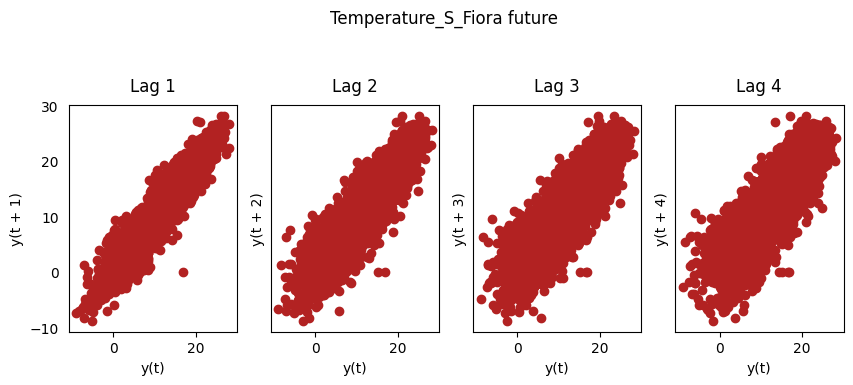

In [ ]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(df['Temperature_S_Fiora'], lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.suptitle('Temperature_S_Fiora future', y=1.2)
plt.show()

In [ ]:
dataset.head(5)

,Temperature_S_Fiora
date,
2000-01-01,-0.15
2000-02-01,1.55
2000-03-01,2.70
2000-04-01,4.00
2000-05-01,4.60


In [ ]:
dataset.head(-10)

,Temperature_S_Fiora
date,
2000-01-01,-0.15
2000-02-01,1.55
2000-03-01,2.70
2000-04-01,4.00
2000-05-01,4.60
...,...
2020-06-16,16.80
2020-06-17,15.10
2020-06-18,15.15


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(dataset['Temperature_S_Fiora'].values)
result

(-5.327810970933993,
 4.794185100694285e-06,
 17,
 7469,
 {'1%': -3.4312258265961395,
  '5%': -2.8619270488143216,
  '10%': -2.56697602170141},
 29777.081056426727)

In [ ]:
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

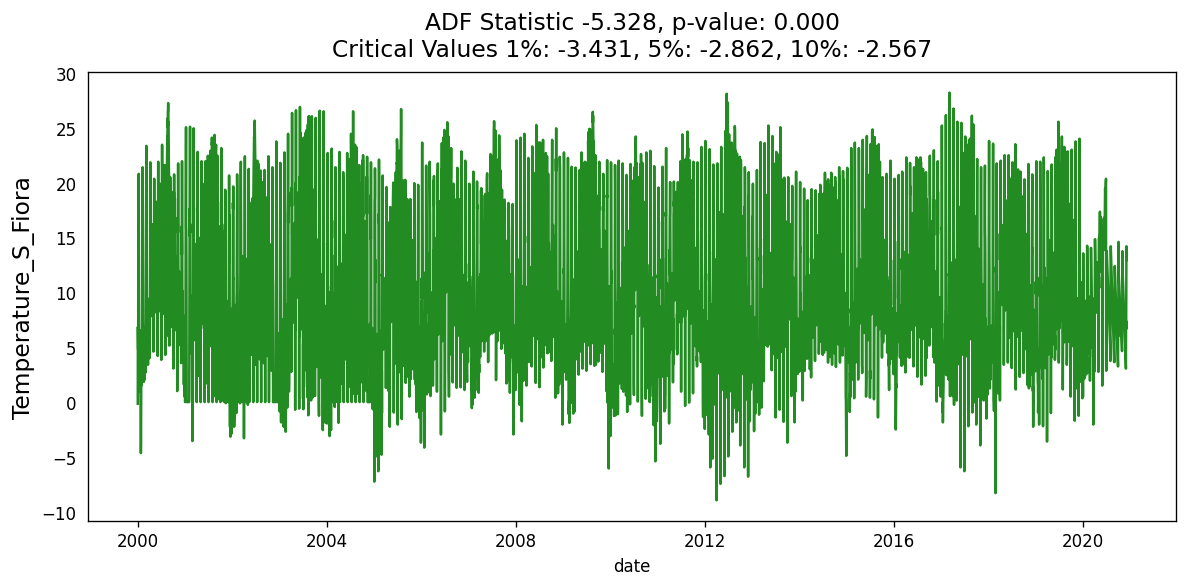

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,5), dpi= 120)
visualize_adfuller_results(dataset['Temperature_S_Fiora'].values, 'Temperature_S_Fiora', ax)
plt.tight_layout()
plt.show()

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
# Using statmodels: Subtracting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose

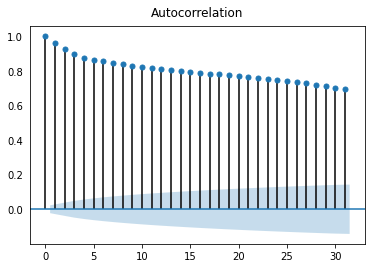

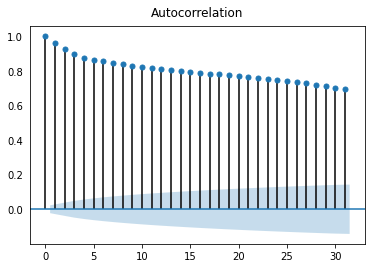

In [ ]:
plot_acf(dataset, lags=31)

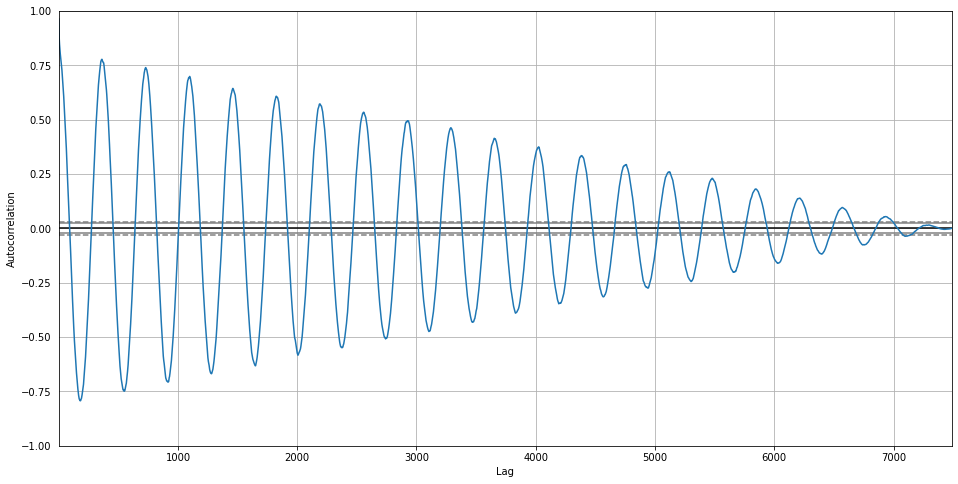

In [ ]:
plt.figure(figsize=(16,8))
autocorrelation_plot(dataset)

In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

Coefficients: [ 1.10988056e+01  1.56752736e+00 -5.70783790e-01 -6.12743047e-01
 -1.50120325e-01 -3.30845857e-02 -3.13097443e-02 -1.26690093e-03
  1.83972113e-02]
predicted=11.788600, expected=13.550000
predicted=12.084786, expected=14.100000
predicted=12.260916, expected=14.050000
predicted=12.323206, expected=14.850000
predicted=12.361514, expected=14.900000
predicted=12.372755, expected=15.550000
predicted=12.375023, expected=13.750000
predicted=12.372161, expected=14.200000
predicted=12.366381, expected=12.400000
predicted=12.358955, expected=11.850000
predicted=12.350612, expected=11.850000
predicted=12.341774, expected=12.950000
predicted=12.332681, expected=16.100000
predicted=12.323473, expected=13.850000
predicted=12.314230, expected=16.050000
predicted=12.304996, expected=16.800000
predicted=12.295797, expected=15.100000
predicted=12.286649, expected=15.150000
predicted=12.277559, expected=14.850000
predicted=12.268532, expected=15.800000
predicted=12.259570, expected=17.35000

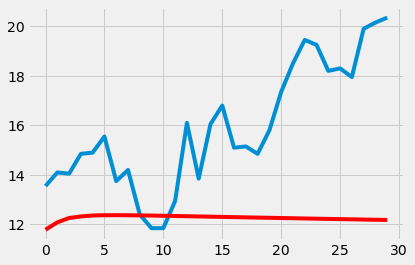

In [ ]:
# create and evaluate a ARMA model
from statsmodels.tsa.arima_model import ARMA

# First Order Differencing

dataset_1 = dataset['Temperature_S_Fiora'].values
size_dataset = len(dataset_1)
train, test = dataset_1[:size_dataset-30], dataset_1[size_dataset-30:]

# fit model
model = ARMA(train, order=(2, 6))
model_fit = model.fit(disp=False)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Coefficients: [11.10004735  1.15375474 -0.05341461 -0.10600679 -0.1988832  -0.272434
 -0.10019813 -0.06761467 -0.03189369]
predicted=11.792718, expected=13.550000
predicted=12.098813, expected=14.100000
predicted=12.275563, expected=14.050000
predicted=12.343557, expected=14.850000
predicted=12.377805, expected=14.900000
predicted=12.383232, expected=15.550000
predicted=12.380457, expected=13.750000
predicted=12.373334, expected=14.200000
predicted=12.364689, expected=12.400000
predicted=12.355389, expected=11.850000
predicted=12.345877, expected=11.850000
predicted=12.336315, expected=12.950000
predicted=12.326777, expected=16.100000
predicted=12.317291, expected=13.850000
predicted=12.307870, expected=16.050000
predicted=12.298518, expected=16.800000
predicted=12.289237, expected=15.100000
predicted=12.280027, expected=15.150000
predicted=12.270889, expected=14.850000
predicted=12.261821, expected=15.800000
predicted=12.252823, expected=17.350000
predicted=12.243895, expected=18.5000

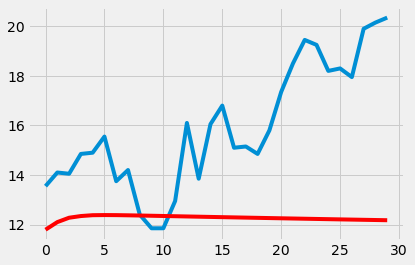

In [ ]:
#ARIMA
size_dataset = len(dataset_1)
train, test = dataset_1[:size_dataset-30], dataset_1[size_dataset-30:]
order = (3, 0, 5)

# fit model
model = ARIMA(train, order=order)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))


model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
print('{} --> AIC={}; BIC={}'.format(model_name, model_fit.aic, model_fit.bic))

rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7457
Model:                     ARMA(3, 5)   Log Likelihood              -14902.109
Method:                       css-mle   S.D. of innovations              1.785
Date:                Tue, 27 Dec 2022   AIC                          29824.217
Time:                        14:04:09   BIC                          29893.386
Sample:                             0   HQIC                         29847.976
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1000      1.181      9.402      0.000       8.786      13.414
ar.L1.y        1.1538      0.505      2.284      0.022       0.164       2.144
ar.L2.y       -0.0534      0.755     -0.071      0.944      -1.533       1.426
ar.L3.y       -0.1060      0.260     -0.408      0.683      -0.615       0.403
ma.L1.y       -0.1989      0.505     -0.394      0.694      -1.189       0.791
ma.L2.y       -0.2724      0.280     -0.974      0.330      -0.821       0.276
ma.L3.y       -0.1002      0.079     -1.275      0.202      -0.254       0.054
ma.L4.y       -0.0676      0.032     -2.113      0.035      -0.130      -0.005
ma.L5.y       -0.0319      0.028     -1.140      0.254      -0.087       0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0078           +0.0000j            1.0078            0.0000
AR.2            2.3956           +0.0000j            2.3956            0.0000
AR.3           -3.9073           +0.0000j            3.9073            0.5000
MA.1            1.1885           -0.0000j            1.1885           -0.0000
MA.2            0.3910           -2.2303j            2.2643           -0.2224
MA.3            0.3910           +2.2303j            2.2643            0.2224
MA.4           -2.0452           -0.9809j            2.2683           -0.4288
MA.5           -2.0452           +0.9809j            2.2683            0.4288
-----------------------------------------------------------------------------
"""

### **Dữ liệu biến đổi từ def Supervidese**

input chu kì là 30 output =>1

In [ ]:
data = series_to_supervised(dataset, n_in=30, n_out=1)

In [ ]:
data

,var1(t-30),var1(t-29),var1(t-28),var1(t-27),var1(t-26),var1(t-25),var1(t-24),var1(t-23),var1(t-22),var1(t-21),...,var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.15,1.55,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,...,2.80,-0.15,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05
2000-01-02,1.55,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,...,-0.15,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85
2000-02-02,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,...,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90
2000-03-02,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,2.55,...,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90,6.70
2000-04-02,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,2.55,3.90,...,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90,6.70,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,11.85,12.35,10.40,11.15,11.40,13.55,14.10,14.05,14.85,14.90,...,15.10,15.15,14.85,15.80,17.35,18.50,19.45,19.25,18.20,18.30
2020-06-27,12.35,10.40,11.15,11.40,13.55,14.10,14.05,14.85,14.90,15.55,...,15.15,14.85,15.80,17.35,18.50,19.45,19.25,18.20,18.30,17.95
2020-06-28,10.40,11.15,11.40,13.55,14.10,14.05,14.85,14.90,15.55,13.75,...,14.85,15.80,17.35,18.50,19.45,19.25,18.20,18.30,17.95,19.90


In [ ]:
X, Y = data.loc[:,'var1(t-30)':'var1(t-1)'], data['var1(t)']
print(X, Y)

            var1(t-30)  var1(t-29)  var1(t-28)  var1(t-27)  var1(t-26)  \
date                                                                     
2000-01-31       -0.15        1.55        2.70        4.00        4.60   
2000-01-02        1.55        2.70        4.00        4.60        4.30   
2000-02-02        2.70        4.00        4.60        4.30        3.85   
2000-03-02        4.00        4.60        4.30        3.85        4.30   
2000-04-02        4.60        4.30        3.85        4.30        5.15   
...                ...         ...         ...         ...         ...   
2020-06-26       11.85       12.35       10.40       11.15       11.40   
2020-06-27       12.35       10.40       11.15       11.40       13.55   
2020-06-28       10.40       11.15       11.40       13.55       14.10   
2020-06-29       11.15       11.40       13.55       14.10       14.05   
2020-06-30       11.40       13.55       14.10       14.05       14.85   

            var1(t-25)  var1(t-24)  v

## **Chia dữ liệu X, Y**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False, random_state=0.2)

In [ ]:
X_test.shape

(1492, 30)

In [ ]:
X_train[:10]

,var1(t-30),var1(t-29),var1(t-28),var1(t-27),var1(t-26),var1(t-25),var1(t-24),var1(t-23),var1(t-22),var1(t-21),...,var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.15,1.55,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,...,4.35,2.80,-0.15,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20
2000-01-02,1.55,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,...,2.80,-0.15,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05
2000-02-02,2.70,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,...,-0.15,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85
2000-03-02,4.00,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,2.55,...,-2.35,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90
2000-04-02,4.60,4.30,3.85,4.30,5.15,4.45,1.00,3.55,2.55,3.90,...,-4.65,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90,6.70
2000-05-02,4.30,3.85,4.30,5.15,4.45,1.00,3.55,2.55,3.90,4.80,...,-3.60,0.55,2.30,5.30,5.20,5.05,6.85,5.90,6.70,4.40
2000-06-02,3.85,4.30,5.15,4.45,1.00,3.55,2.55,3.90,4.80,2.65,...,0.55,2.30,5.30,5.20,5.05,6.85,5.90,6.70,4.40,4.70
2000-07-02,4.30,5.15,4.45,1.00,3.55,2.55,3.90,4.80,2.65,0.95,...,2.30,5.30,5.20,5.05,6.85,5.90,6.70,4.40,4.70,5.60
2000-08-02,5.15,4.45,1.00,3.55,2.55,3.90,4.80,2.65,0.95,6.55,...,5.30,5.20,5.05,6.85,5.90,6.70,4.40,4.70,5.60,4.85


In [ ]:
Y_test.shape

(1492,)

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(30, 1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 43,351
Trainable params: 43,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf


In [ ]:
his = model.fit(X_train, Y_train, epochs=300, batch_size = 500, verbose = 0)

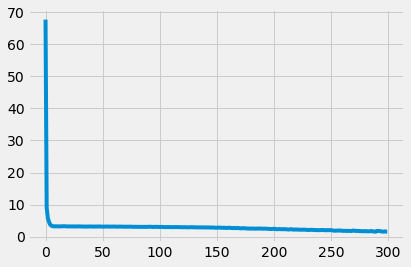

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
pr1 = model.predict(X_test)
pr1_tr = model.predict(X_train)


187/187 [==============================] - 2s 9ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

In [ ]:
def draw_true_predict_train(y_true, y_pred):
    size = len(y_true)
    plt.figure(figsize = (16, 8))
    plt.title('Dữ liệu Train')
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.show()


def draw_true_predict_test(y_true, y_pred):
    size = len(y_true)
    plt.figure(figsize = (16, 8))
    plt.title('Dữ liệu test')
    plt.plot(list(range(size)), y_true, label='real', color='blue')
    plt.plot(list(range(size)), y_pred, label='predicted', color='red')
    plt.legend(loc='best')
    plt.show()

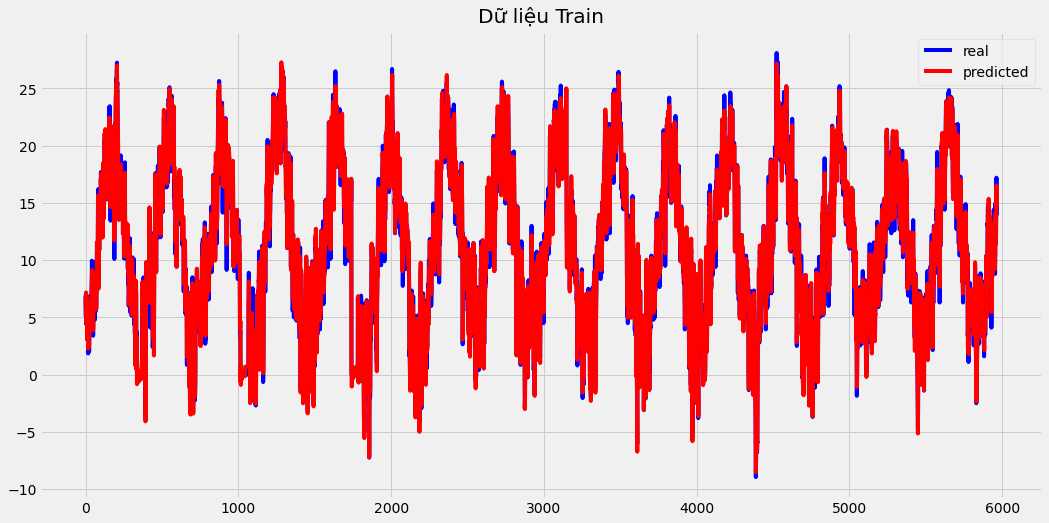

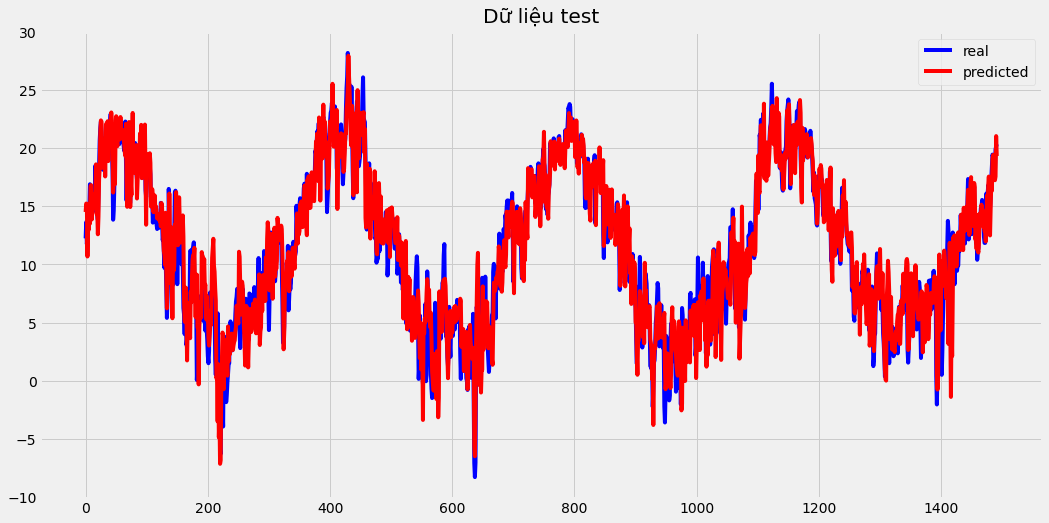

In [ ]:
draw_true_predict_train(Y_train, pr1_tr)
draw_true_predict_test(Y_test, pr1)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input

In [ ]:
n_steps=30

In [ ]:
model1 = Sequential()
model1.add(Dense(100, activation = 'relu', input_dim = n_steps))
model1.add(Dense(1))
model1.compile(optimizer = 'adam', loss = 'mse')

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               3100      
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
his1 = model1.fit(X_train, Y_train, epochs=300, batch_size = 500, verbose = 0)

In [ ]:
pr2 = model1.predict(X_test)
pr2_tr = model1.predict(X_train)


187/187 [==============================] - 1s 3ms/step


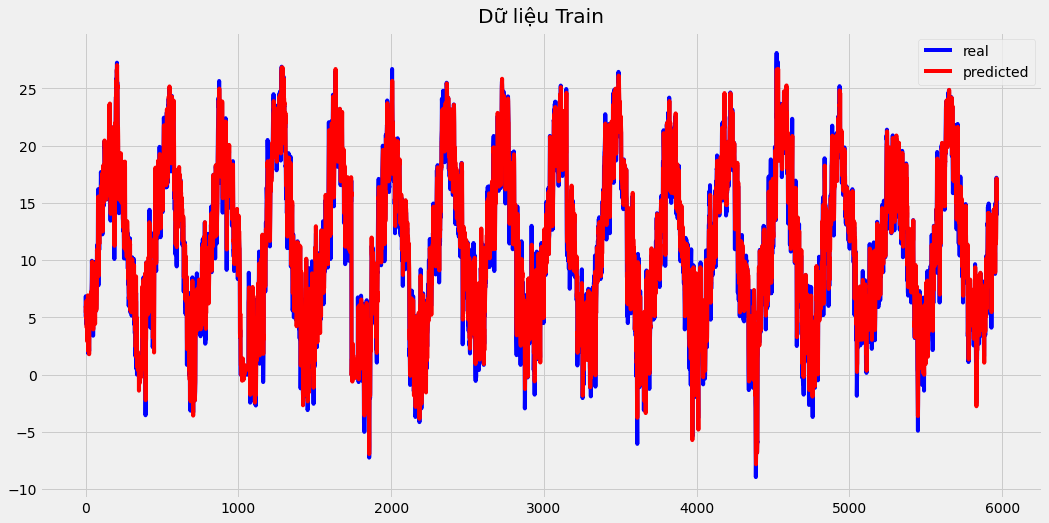

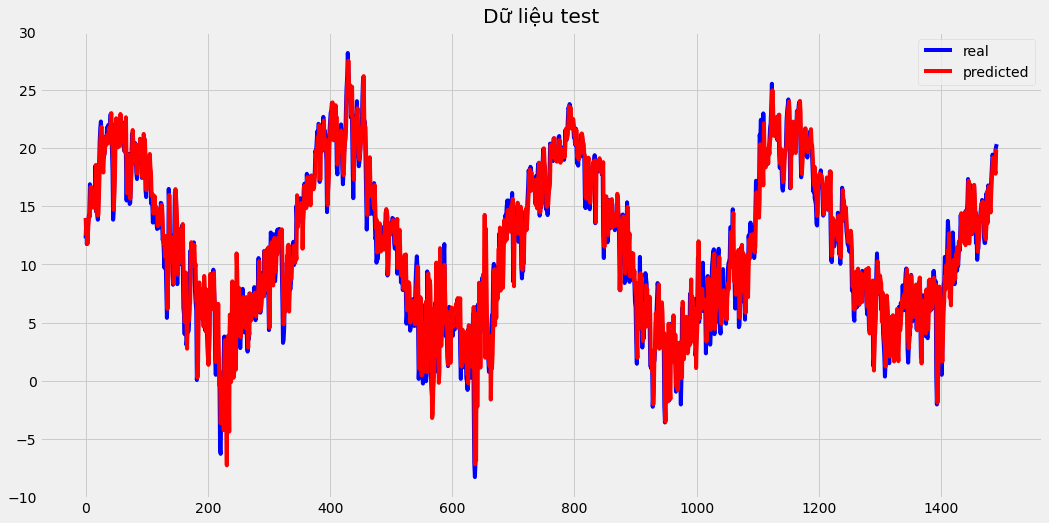

In [ ]:
draw_true_predict_train(Y_train, pr2_tr)
draw_true_predict_test(Y_test, pr2)

Calculate matrics

In [ ]:
pr1

array([[14.514177],
       [15.236832],
       [15.226909],
       ...,
       [17.562622],
       [21.043556],
       [19.333744]], dtype=float32)

In [ ]:
#train
MSE_LSTM = mean_squared_error(Y_train, pr1_tr)
MAE_LSTM = mean_absolute_error(Y_train, pr1_tr)
R2_LSTM  = r2_score(Y_train, pr1_tr)
print(f"MSE_LSTM_train: {MSE_LSTM}, MAE_LSTM_train: {MAE_LSTM}, R2_LSTM_train: {R2_LSTM}")

MSE_LSTM_train: 0.7817485849977683, MAE_LSTM_train: 0.644855108969819, R2_LSTM_train: 0.9834291313709699


In [ ]:
#test
MSE_LSTM1 = mean_squared_error(Y_test, pr1)
MAE_LSTM1 = mean_absolute_error(Y_test, pr1)
R2_LSTM1 = r2_score(Y_test, pr1)
print(f"MSE_LSTM_test: {MSE_LSTM1}, MAPE_LSTM_test: {MAE_LSTM1}, R2_LSTM_test: {R2_LSTM1}")

MSE_LSTM_test: 5.723487706276716, MAPE_LSTM_test: 1.7790941805706106, R2_LSTM_test: 0.8665522686816373


In [ ]:
#train
MSE_MLP = mean_squared_error(Y_train, pr2_tr)
MAE_MLP = mean_absolute_error(Y_train, pr2_tr)
R2_MLP  = r2_score(Y_train, pr2_tr)
print(f"MSE_MLP_train: {MSE_MLP}, MAE_MLP_train: {MAE_MLP}, R2_MLP_train: {R2_MLP}")

MSE_MLP_train: 2.466639362268938, MAE_MLP_train: 1.165656360718925, R2_MLP_train: 0.9477141914782362


In [ ]:
#test
MSE_MLP1 = mean_squared_error(Y_test, pr2)
MAE_MLP1 = mean_absolute_error(Y_test, pr2)
R2_MLP1 = r2_score(Y_test, pr2)
print(f"MSE_MLP_test: {MSE_MLP1}, MAPE_MLP_test: {MAE_MLP1}, R2_MLP_test: {R2_MLP1}")

MSE_MLP_test: 4.111771377321213, MAPE_MLP_test: 1.4954716650704198, R2_MLP_test: 0.9041307345866137


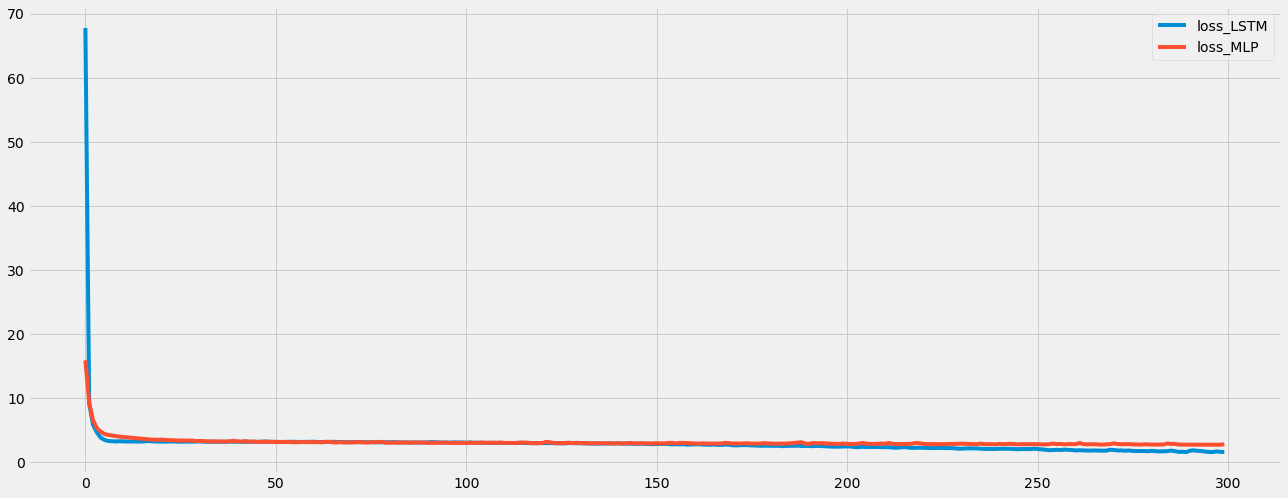

In [ ]:
plt.figure(figsize = (20, 8))
plt.plot(his.history['loss'], label='loss_LSTM')
plt.plot(his1.history['loss'], label='loss_MLP')
plt.legend()
plt.show()

Tối ưu hóa tham số LSTM


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
def load_model( optimizer = 'adam'):
  model_a = Sequential()
  model_a.add(LSTM(100, activation='relu', input_shape=(30, 1)))
  model_a.add(Dense(25))
  model_a.add(Dense(1))
  # model_a.compile(optimizer = optimizer, loss='mse', metrics = ['mean_squared_error'])
  model_a.compile(optimizer = optimizer, loss='mse')
  return model_a

grid_model_lstm = KerasClassifier(build_fn=load_model)
parameters_lstm = {'batch_size' : [500, 600],
              'epochs' : [100,300],
              'optimizer' : ['adam'] }
grid_search_lstm  = GridSearchCV(estimator = grid_model_lstm,
                            param_grid = parameters_lstm,
                              scoring = 'accuracy',
                            cv =2)

In [ ]:
grid_search_lstm = grid_search_lstm.fit(X_train,Y_train, verbose = 0)

94/94 [==============================] - 1s 9ms/step


In [ ]:
best_parameters_lstm = grid_search_lstm.best_params_

In [ ]:
best_parameters_lstm

{'batch_size': 500, 'epochs': 100, 'optimizer': 'adam'}

tối ưu hóa tham số MLP


In [ ]:
def load_model1( optimizer = 'adam'):
  model_b = Sequential()
  model_b.add(Dense(100, activation = 'relu', input_dim = n_steps))
  model_b.add(Dense(1))
  model_b.compile(optimizer = 'adam', loss = 'mse')
  return model_b

grid_model_mlp = KerasClassifier(build_fn=load_model1)
parameters_mlp = {'batch_size' : [500, 600],
              'epochs' : [100,300],
              'optimizer' : ['adam'] }
grid_search_mlp  = GridSearchCV(estimator = grid_model_mlp,
                            param_grid = parameters_mlp,
                                               cv =2)

In [ ]:
grid_search_mlp = grid_search_mlp.fit(X_train,Y_train, verbose = 0)

5/5 [==============================] - 0s 5ms/step - loss: 1387.5374


In [ ]:
best_parameters_mlp = grid_search_mlp.best_params_

In [ ]:
best_parameters_mlp

{'batch_size': 500, 'epochs': 100, 'optimizer': 'adam'}

In [ ]:
model_op = load_model()
model_op1 = load_model1()

In [ ]:
his_lstm_op = model_op.fit(X_train, Y_train, epochs=100, batch_size = 500, verbose = 0)

In [ ]:
his_mlp_op = model_op1.fit(X_train, Y_train, epochs=100, batch_size = 500, verbose = 0)

In [ ]:
pr_ls = model_op.predict(X_train)
pr_ls1 = model_op.predict(X_test)

47/47 [==============================] - 1s 13ms/step


In [ ]:
pr_ml = model_op1.predict(X_train)
pr_ml1 = model_op1.predict(X_test)

47/47 [==============================] - 0s 1ms/step


Final Calculate matrics

In [ ]:
#train
MSE_LSTM_01 = mean_squared_error(Y_train, pr_ls)
MAE_LSTM_01 = mean_absolute_error(Y_train, pr_ls)
R2_LSTM_01  = r2_score(Y_train, pr_ls)
print(f"MSE_LSTM_train: {MSE_LSTM_01}, MAE_LSTM_train: {MAE_LSTM_01}, R2_LSTM_train: {R2_LSTM_01}")

MSE_LSTM_train: 2.8960677527099077, MAE_LSTM_train: 1.2868336505215532, R2_LSTM_train: 0.9386115188541553


In [ ]:
#test
MSE_LSTM_11 = mean_squared_error(Y_test, pr_ls1)
MAE_LSTM_11 = mean_absolute_error(Y_test, pr_ls1)
R2_LSTM_11 = r2_score(Y_test, pr_ls1)
print(f"MSE_LSTM_test: {MSE_LSTM_11}, MAPE_LSTM_test: {MAE_LSTM_11}, R2_LSTM_test: {R2_LSTM_11}")

MSE_LSTM_test: 3.87545894019249, MAPE_LSTM_test: 1.4036758252059987, R2_LSTM_test: 0.9096405496216942


In [ ]:
#train
MSE_MLP_01 = mean_squared_error(Y_train, pr_ml)
MAE_MLP_01 = mean_absolute_error(Y_train, pr_ml)
R2_MLP_01  = r2_score(Y_train, pr_ml)
print(f"MSE_MLP_train: {MSE_MLP_01}, MAE_MLP_train: {MAE_MLP_01}, R2_MLP_train: {R2_MLP_01}")

MSE_MLP_train: 2.9194491996245207, MAE_MLP_train: 1.2851534956527526, R2_MLP_train: 0.9381158980207901


In [ ]:
#test
MSE_MLP_11 = mean_squared_error(Y_test, pr_ml1)
MAE_MLP_11 = mean_absolute_error(Y_test, pr_ml1)
R2_MLP_11 = r2_score(Y_test, pr_ml1)
print(f"MSE_MLP_test: {MSE_MLP_11}, MAPE_MLP_test: {MAE_MLP_11}, R2_MLP_test: {R2_MLP_11}")

MSE_MLP_test: 3.2689163792025586, MAPE_MLP_test: 1.3608568439514803, R2_MLP_test: 0.9237825785498547


Chart

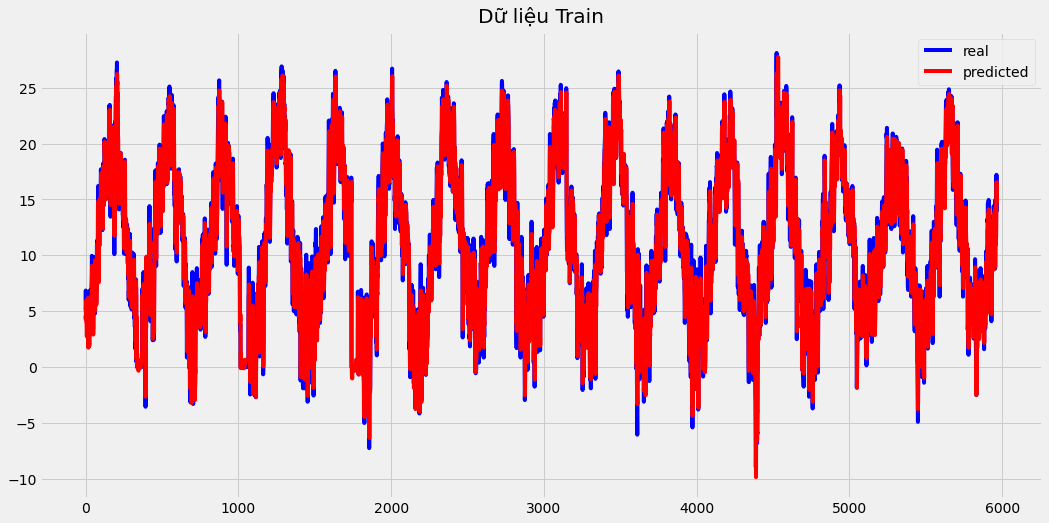

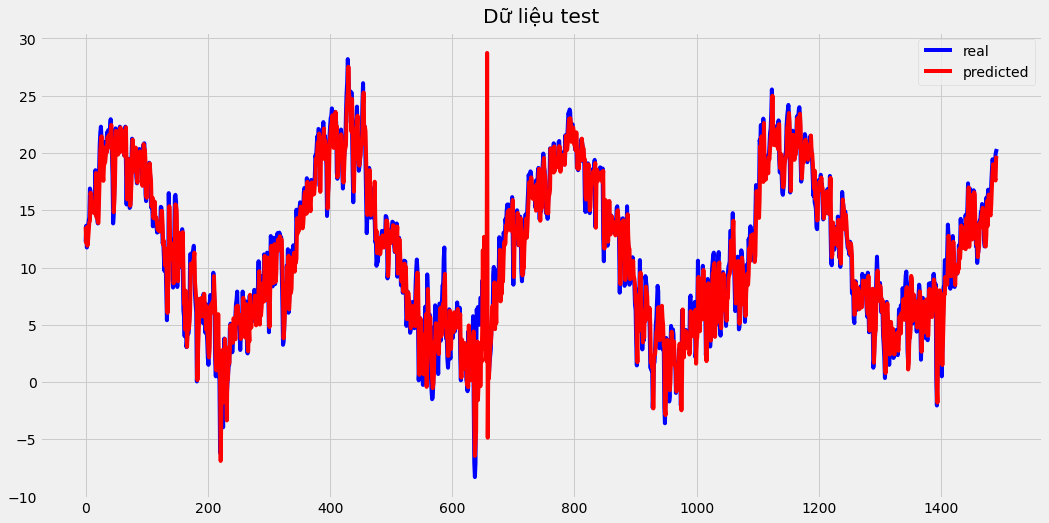

In [ ]:
draw_true_predict_train(Y_train, pr_ls)
draw_true_predict_test(Y_test, pr_ls1)

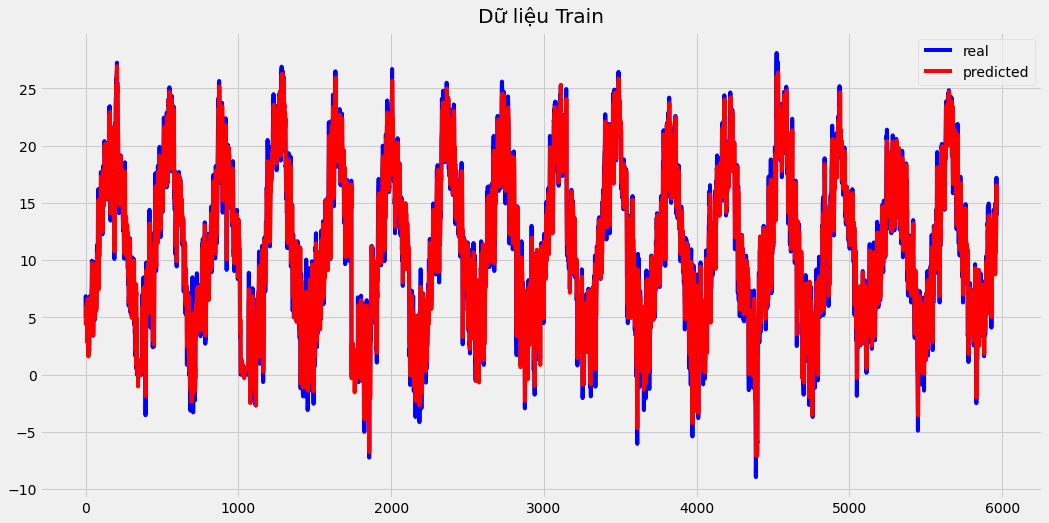

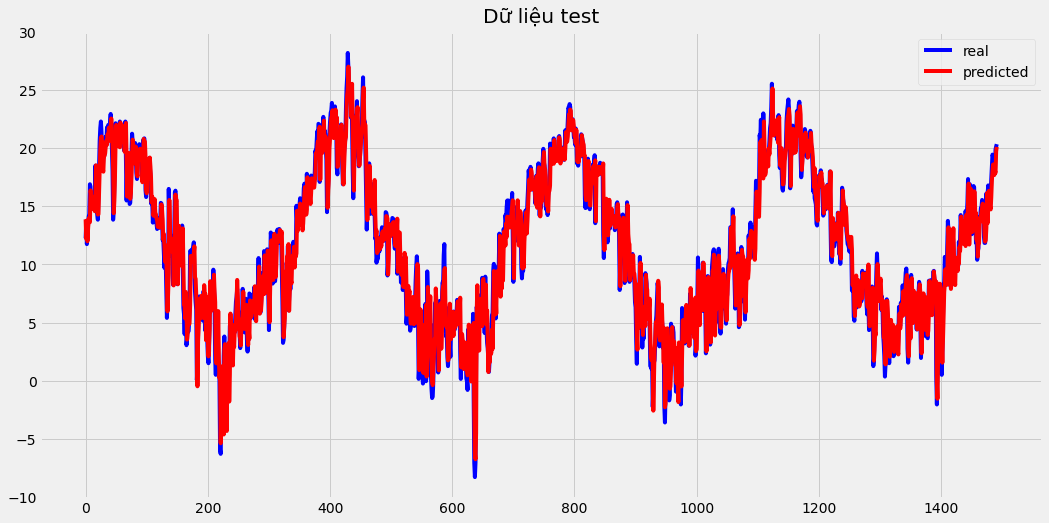

In [ ]:
draw_true_predict_train(Y_train, pr_ml)
draw_true_predict_test(Y_test, pr_ml1)